# Classification Analysis

In this session, we will cover the following topics:

1. Intoduction and Motivation
2. Logistic Regression
3. Softmax Regression 
4. Evaluation metrics

>  Refer to: Gareth, et al. 4.3 , Bishop 4.3  


# 1. Intoduction and Motivation

The goal of classification analysis is to predict the category or class to which a new observation belongs, based on a set of input variables.

Given a set of observed data points $X = {x_0, x_1, ..., x_n}$ with corresponding class labels $Y = { y_0, y_1, ..., y_n}$, the objective is to find a function $y = f(x, \theta)$ that maps input variables $x$ to class labels $y$, where $\theta$ are the parameters of the model to be determined.

There are two main types of classification:
- **Binary classification**: Predicting one of **two possible categories** (e.g., yes/no, pass/fail).
- **Multi-class classification**: Predicting from **more than two categories** (e.g., classifying images of handwritten digits as 0-9).

In this session, we will explore two classification methods:
- **Logistic Regression** for binary classification.
- **Softmax Regression** for multi-class classification.


# 2. Logistic Regression

Logistic regression is a method for binary classification that predicts the probability that an input belongs to one of two classes by modeling the relationship between the input features $x$ and the output probability $P(y=1|x)$.

The model applies a sigmoid function to the linear combination of input features to produce a probability.

## Sigmoid Function

The sigmoid function is a non-linear transformation that maps its input to a value within the range [0, 1].

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

- When $z$ is a large positive number, $\sigma(z)$ approaches 1.
- When $z$ is a large negative number, $\sigma(z)$ approaches 0.

The sigmoid function allows us to interpret the output of a linear model as a **probability**.
In logistic regression, this probability helps us decide between two classes.


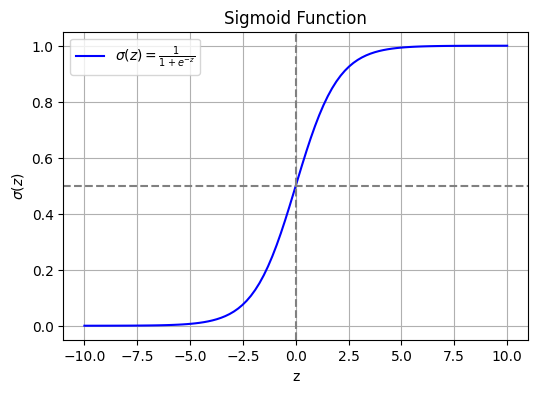

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sigmoid_values = sigmoid(z)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid_values, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='b')
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel(r'$\sigma(z)$')
plt.grid(True)
plt.axvline(0, color='gray', linestyle='--')
plt.axhline(0.5, color='gray', linestyle='--')
plt.legend(loc='upper left')
plt.show()


## Logistic regression formula
Logistic regression uses the **sigmoid function** to transform the **linear combination** of input features into a probability:

$$
P(y=1|x) = \sigma(w^T x + b) = \frac{1}{1 + e^{-(w^T x + b)}}
$$

- $w^T x$ represents the **weighted sum** of the input features, and $b$ is the **bias**.
- The sigmoid function converts this weighted sum into a probability between 0 and 1.

### Decision Rule:
- If $P(y=1|x) > 0.5$, we predict **class 1**.
- If $P(y=1|x) \leq 0.5$, we predict **class 0**.

The **decision boundary** is where $P(y=1|x) = 0.5$, meaning we are uncertain about the prediction.

## Logistic Regression Loss Function 

Logistic regression is trained by minimizing the **log-loss** or **binary cross-entropy loss**, which measures the difference between predicted probabilities and true labels.

$$
L(\hat{y}, y) = - \left( y \log(\hat{y}) + (1 - y) \log(1 - \hat{y}) \right)
$$


- $y$ is the true label (either 0 or 1), and $\hat{y}$ is the predicted probability of class 
- $\hat{y}$ is the predicted probability of class 1.
- $\hat{y} = 0.9$ and the true label is 1, the log-loss is **small** because the model is confident and correct.
- $\hat{y} = 0.1$ and the true label is 1, the log-loss is **large** because the model is confident but wrong.
- The log-loss **penalizes incorrect confident predictions** more heavily, ensuring that the model improves in areas where it is most wrong.





 ## Example: predicting cell survival based on drug concentration
This dataset contains measurements of drug concentration (µg/ml) and whether cells survived after exposure.  
Using logistic regression, we aim to predict the probability of cell survival based on the concentration.  
Low drug concentrations increase the probability of survival, while higher concentrations decrease it.


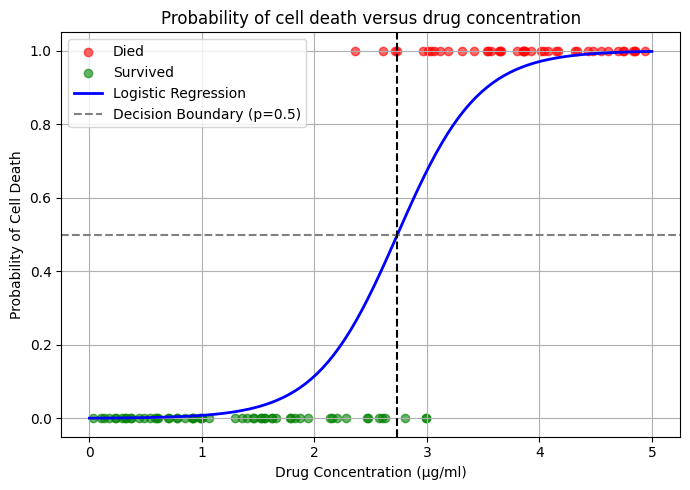

In [2]:
from sklearn.linear_model import LogisticRegression

# Simulate drug concentration and cell death
np.random.seed(42)
drug_concentration = np.random.uniform(0, 5, 100)  
cell_death = (drug_concentration + np.random.normal(0, 0.5, 100)) > 2.5  # Cells die above 2.5 

# Train logistic regression model
X_drug = drug_concentration.reshape(-1, 1)
log_reg_drug = LogisticRegression()
log_reg_drug.fit(X_drug, cell_death)

# Predict probabilities for drug concentration
drug_vals = np.linspace(0, 5, 100).reshape(-1, 1)
death_probabilities = log_reg_drug.predict_proba(drug_vals)[:, 1]  

plt.figure(figsize=(7, 5))
plt.scatter(drug_concentration[cell_death], cell_death[cell_death], color='red', label='Died', alpha=0.6)
plt.scatter(drug_concentration[~cell_death], cell_death[~cell_death], color='green', label='Survived', alpha=0.6)

# Plot the logistic regression curve
plt.plot(drug_vals, death_probabilities, color='blue', label='Logistic Regression', linewidth=2)

# Show the decision boundary (where p=0.5)
plt.axhline(0.5, color='gray', linestyle='--', label='Decision Boundary (p=0.5)')
plt.axvline(log_reg_drug.intercept_ / -log_reg_drug.coef_[0], color='black', linestyle='--')

plt.title("Probability of cell death versus drug concentration")
plt.xlabel("Drug Concentration (µg/ml)")
plt.ylabel("Probability of Cell Death")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Logisic Regression Visualization
Head to [Logistic regression](https://ramsane.github.io/ml-playground/logistic_regression/) to visually explore the behavior of this model on different datasets.

> Credit: https://github.com/ramsane/ml-playground 

# 3. Softmax Regression

Logistic regression works well for binary classification problems, but many real-world problems involve **multiple classes**.

To handle **multi-class classification**, we extend logistic regression to **softmax regression**.


## The Softmax Function

The **softmax function** is used in multi-class classification to convert raw scores (logits) into **probabilities** for each class, producing a probability distribution over all possible classes.

$$
P(y=k|x) = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$$

- $z_k$ is the score (logit) for class $k$.
- All class probabilities are **non-negative** and **sum to 1**, forming a valid probability distribution.

The class with the **highest probability** is selected as the **predicted class**, calculated by:

$$
\hat{y} = \text{argmax}_k \, P(y=k|x)
$$


## Softmax Regression Loss Function (Categorical Cross-Entropy)

In **softmax regression**, we use the **categorical cross-entropy loss** to measure how well the model’s predicted probabilities match the true labels in multi-class classification.

$$
L(\hat{y}, y) = - \sum_{i=1}^{K} y_i \log(\hat{y}_i)
$$

- $K$ is the number of classes.
- $y_i$ is the true label for class $i$ (one-hot encoded: 1 if it's the true class, 0 otherwise).
- $\hat{y}_i$ is the predicted probability for class $i$.

The loss function penalizes the model when it assigns **low probabilities** to the correct class and **high probabilities** to the wrong classes.  
The goal of softmax regression is to assign the **highest probability** to the **correct class**, and the categorical cross-entropy ensures that the model focuses on improving these probabilities.


### Example: classifying tumor types
This dataset contains measurements of different tumor cell types: **benign**, **malignant**, and **invasive** tumors.  
Using softmax regression, we aim to predict the probability of each cell type based on cellular density and nucleus size.


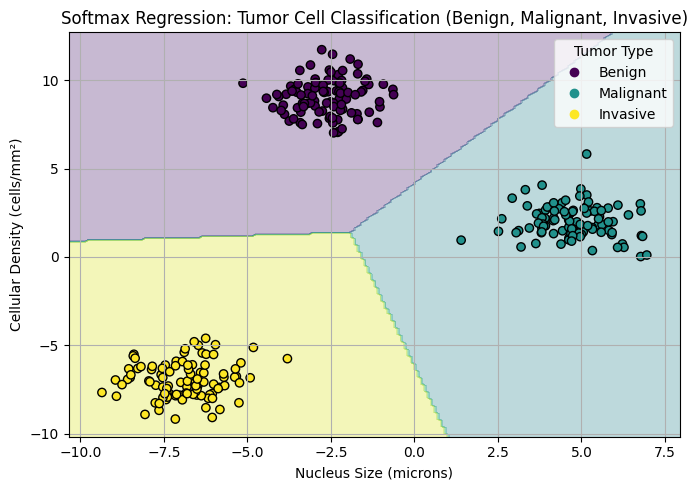

In [3]:
from sklearn.datasets import make_blobs

# Generate a dataset with 3 classes representing different tumor cell types: benign, malignant, and invasive
X_tumor, y_tumor = make_blobs(n_samples=300, centers=3, n_features=2, random_state=42)

tumor_labels = {0: "Benign", 1: "Malignant", 2: "Invasive"}

# Train a softmax regression (multinomial logistic regression) model
log_reg_tumor = LogisticRegression(solver='lbfgs')
log_reg_tumor.fit(X_tumor, y_tumor)

# Create a mesh grid for plotting decision boundaries with lower resolution
x_min, x_max = X_tumor[:, 0].min() - 1, X_tumor[:, 0].max() + 1
y_min, y_max = X_tumor[:, 1].min() - 1, X_tumor[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict class probabilities formesh grid
Z = log_reg_tumor.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the multi-class classification boundaries and the data points
plt.figure(figsize=(7, 5))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
scatter = plt.scatter(X_tumor[:, 0], X_tumor[:, 1], c=y_tumor, edgecolors='k', cmap='viridis')

# legend
handles, _ = scatter.legend_elements()
legend_labels = [tumor_labels[int(label)] for label in np.unique(y_tumor)]  
plt.legend(handles=handles, labels=legend_labels, title="Tumor Type", loc="upper right")

plt.title("Softmax Regression: Tumor Cell Classification (Benign, Malignant, Invasive)")
plt.xlabel("Nucleus Size (microns)")
plt.ylabel("Cellular Density (cells/mm²)")
plt.grid(True)
plt.tight_layout()
plt.show()


# 4. Evaluation Metrics for Classification Tasks

In classification tasks, evaluating model performance is not trivial. Several metrics are commonly used to assess prediction quality. Below, we discuss key metrics: accuracy, precision, recall, F1 score, and the confusion matrix.

#### Accuracy
Accuracy measures the proportion of correct predictions made by the model.

$$
\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}
$$

#### Precision
Precision measures the accuracy of positive predictions:

$$
\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
$$

- High precision indicates a low false positive rate.
- In artifact detection in STM microscopy, high precision ensures that predictions of tip issues are mostly correct, minimizing unnecessary cleaning procedures.

#### Recall
Recall (Sensitivity) measures the ability of the model to find all relevant instances.

$$
\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
$$

- High recall indicates that most positive instances are captured.
- In disease screening, high recall ensures that most actual cases are identified, reducing the risk of missing patients needing treatment.

#### F1 Score
F1 Score is the harmonic mean of precision and recall, useful for imbalanced class distributions.

$$
\text{F1 Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

- The F1 score balances the trade-off between precision and recall.

#### Confusion Matrix
The confusion matrix summarizes prediction results, visualizing performance.

For binary classification, it can be represented as:

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| Actual Positive | True Positive (TP) | False Negative (FN) |
| Actual Negative | False Positive (FP) | True Negative (TN)   |

The confusion matrix provides insight into accuracy and the types of errors made by the classifier.

### Example with imbalanced dataset

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Create an imbalanced dataset
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, 
                           n_redundant=0, n_clusters_per_class=1, 
                           weights=[0.9, 0.1], flip_y=0., random_state=42, class_sep=0.5)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Text(0.5, 1.0, 'Imbalanced Dataset')

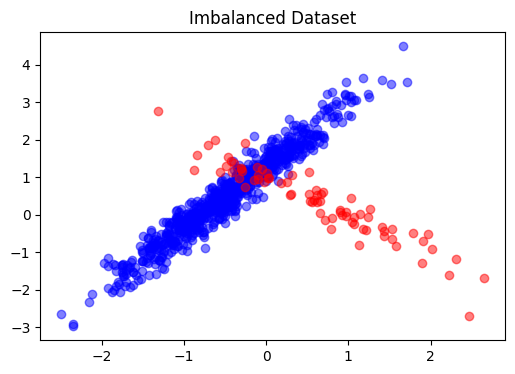

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='b', label='Class 0', alpha=0.5)
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='r', label='Class 1', alpha=0.5)
plt.title("Imbalanced Dataset")

Accuracy: 0.92
Precision: 1.0
Recall: 0.3333333333333333
F1 Score: 0.5


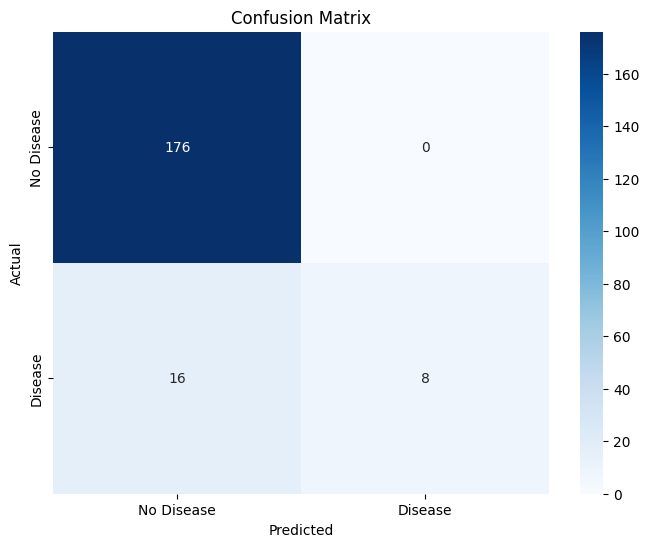

In [6]:
# Train a logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Make predictions
y_pred = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


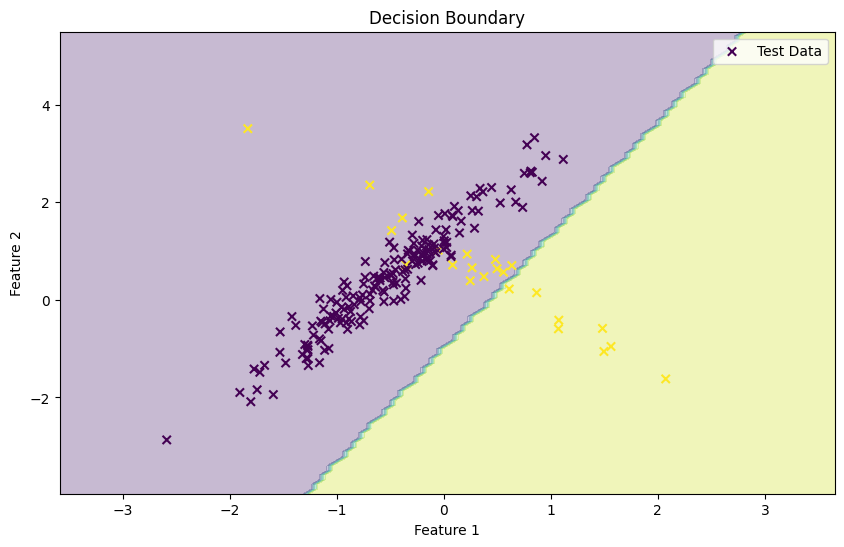

In [7]:
plt.figure(figsize=(10, 6))
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100), 
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))
Z = log_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test Data')
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


Weighted Model Results:
Accuracy: 0.865
Precision: 0.4594594594594595
Recall: 0.7083333333333334
F1 Score: 0.5573770491803278


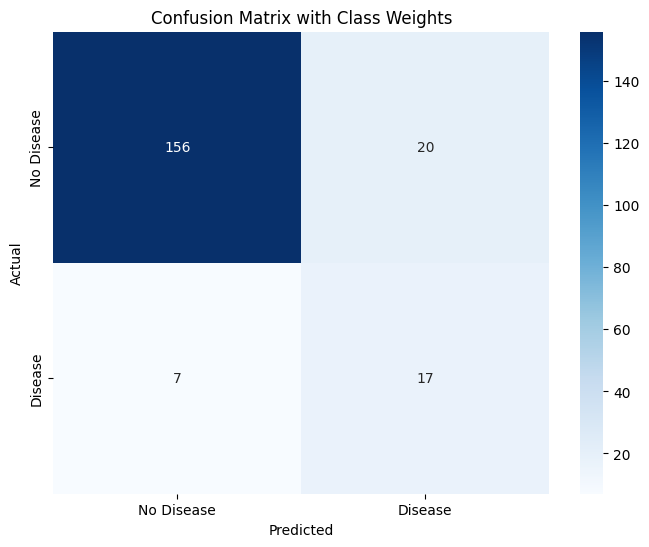

In [8]:
# Now, train a logistic regression model with class weights
log_reg_weighted = LogisticRegression(class_weight='balanced')
log_reg_weighted.fit(X_train, y_train)

# Make predictions
y_pred_weighted = log_reg_weighted.predict(X_test)

# Evaluate the model
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)

# Calculate precision, recall, and F1 score for the weighted model
precision_weighted = precision_score(y_test, y_pred_weighted)
recall_weighted = recall_score(y_test, y_pred_weighted)
f1_weighted = f1_score(y_test, y_pred_weighted)

# Print the results
print("\nWeighted Model Results:")
print("Accuracy:", accuracy_weighted)
print("Precision:", precision_weighted)
print("Recall:", recall_weighted)
print("F1 Score:", f1_weighted)

# Visualize the confusion matrix for the weighted model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_weighted, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with Class Weights')
plt.show()

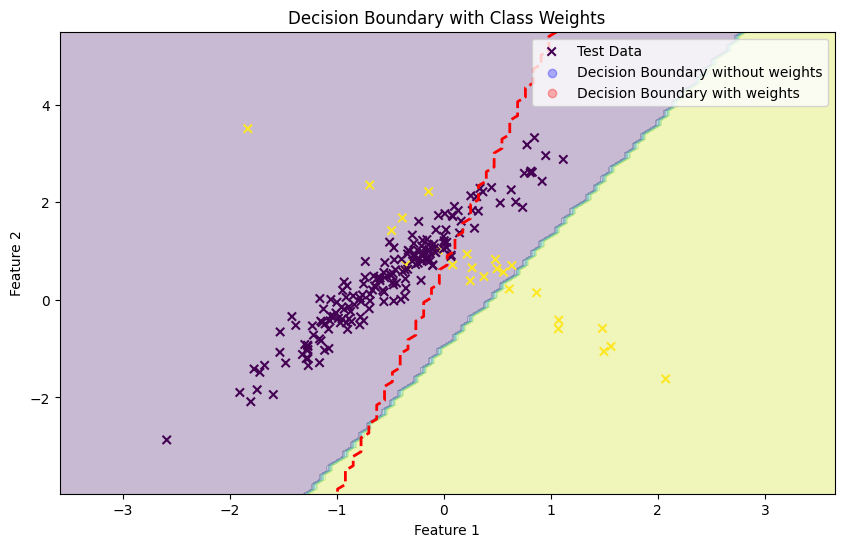

In [9]:
plt.figure(figsize=(10, 6))
Z_weighted = log_reg_weighted.predict(np.c_[xx.ravel(), yy.ravel()])
Z_weighted = Z_weighted.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
plt.contour(xx, yy, Z_weighted, levels=[0.5], colors='red', linestyles='--', linewidths=2)
#plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='o', label='Train Data')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test Data')
plt.title('Decision Boundary with Class Weights')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.scatter([], [], color='blue', label='Decision Boundary without weights', alpha=0.3)
plt.scatter([], [], color='red', label='Decision Boundary with weights', alpha=0.3)
plt.legend()
plt.show()

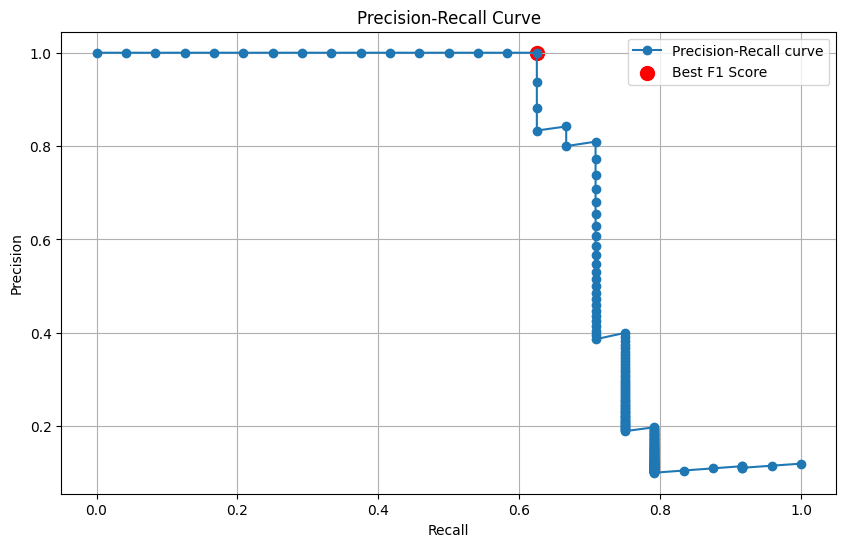

Best Threshold: 0.2283945982264824
Best F1 Score: 0.7692307687573964


In [10]:
# Import necessary libraries
from sklearn.metrics import precision_recall_curve


# Get predicted probabilities
y_scores = log_reg.predict_proba(X_test)[:, 1]

# Compute precision and recall for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-9)
best_f1_index = np.argmax(f1_scores)
best_f1_recall = recall[best_f1_index]
best_f1_precision = precision[best_f1_index]
best_threshold = thresholds[best_f1_index]


# Plotting the Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='o', label='Precision-Recall curve')
plt.scatter(best_f1_recall, best_f1_precision, color='red', label='Best F1 Score', s=100)  # Highlighting the best F1 point
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

# Print the best threshold and F1 score
print("Best Threshold:", best_threshold)
print("Best F1 Score:", f1_scores[best_f1_index])

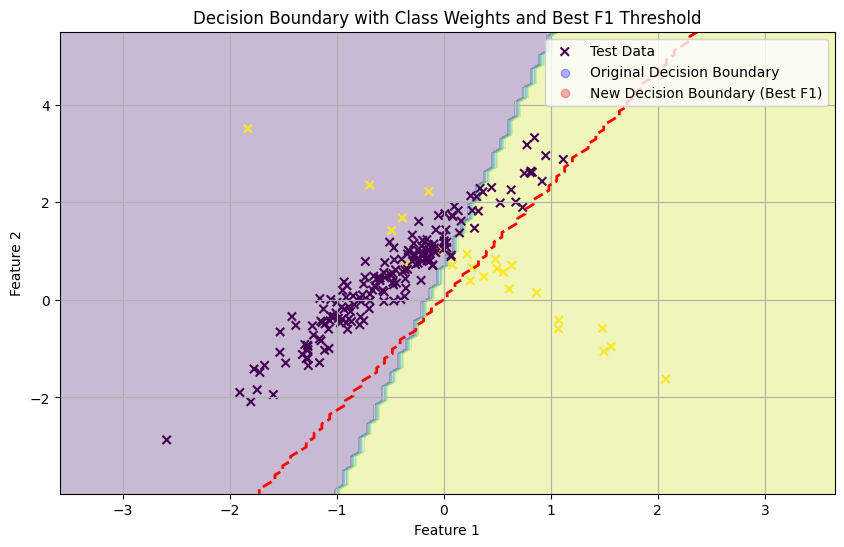

In [11]:
plt.figure(figsize=(10, 6))

# Compute the decision boundary for the original model
Z_weighted = log_reg_weighted.predict(np.c_[xx.ravel(), yy.ravel()])
Z_weighted = Z_weighted.reshape(xx.shape)

# Plot the original decision boundary
plt.contourf(xx, yy, Z_weighted, alpha=0.3)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test Data')
plt.title('Decision Boundary with Class Weights and Best F1 Threshold')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)

# Now compute the new decision boundary based on the best F1 threshold
y_scores_new_threshold = (y_scores >= best_threshold).astype(int)

# Plot the new decision boundary using the best threshold
Z_new_threshold = (log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1] >= best_threshold).astype(int)
Z_new_threshold = Z_new_threshold.reshape(xx.shape)

# Overlay the new decision boundary
plt.contour(xx, yy, Z_new_threshold, levels=[0.5], colors='red', linestyles='--', linewidths=2)

# Add a legend for both boundaries
plt.scatter([], [], color='blue', label='Original Decision Boundary', alpha=0.3)
plt.scatter([], [], color='red', label='New Decision Boundary (Best F1)', alpha=0.3)
plt.legend()

# Show the plot
plt.show()


Best Threshold Results:
Accuracy: 0.955
Precision: 1.0
Recall: 0.625
F1 Score: 0.7692307687573964


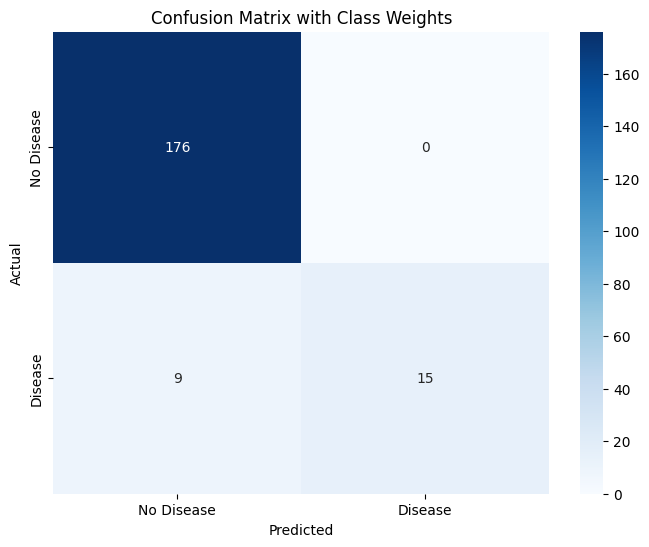

In [12]:
y_pred_best_threshold = (y_scores >= best_threshold).astype(int)
accuracy_best_threshold = accuracy_score(y_test, y_pred_best_threshold)
conf_matrix_treshold = confusion_matrix(y_test, y_pred_best_threshold)

# Print the results
print("\nBest Threshold Results:")
print("Accuracy:", accuracy_best_threshold)
print("Precision:", best_f1_precision)
print("Recall:", best_f1_recall)
print("F1 Score:", f1_scores[best_f1_index])
# Visualize the confusion matrix for the weighted model
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_treshold, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['No Disease', 'Disease'], 
            yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix with Class Weights')
plt.show()

# Summary

### Logistic Regression:
- Logistic regression is used for **binary classification**.
- It outputs the probability that an input belongs to class 1 using the **sigmoid function**.
- The decision rule is to classify inputs based on whether the probability is greater than or less than 0.5.

### Softmax Regression:
- Softmax regression generalizes logistic regression to handle **multi-class classification**.
- It outputs a **probability distribution** over all possible classes using the **softmax function**.
- The class with the highest probability is selected as the predicted class.

### Evaluation Metrics:
- **Accuracy** measures the proportion of correct predictions.
- **Precision** indicates the accuracy of positive predictions, minimizing false positives.
- **Recall** measures the ability to capture relevant instances, reducing false negatives.
- **F1 Score** balances precision and recall, useful for imbalanced datasets.
- The **confusion matrix** visualizes prediction results and types of errors made by the classifier.